by [MachinaFantasma](https://phantomachine.github.io/) | [Twitter](https://twitter.com/MachinaFantasma)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Apple,-Oranges,-Quantities-and-Inflation" data-toc-modified-id="Apple,-Oranges,-Quantities-and-Inflation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Apple, Oranges, Quantities and Inflation</a></span><ul class="toc-item"><li><span><a href="#Problems?" data-toc-modified-id="Problems?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problems?</a></span></li><li><span><a href="#Solutions?" data-toc-modified-id="Solutions?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Solutions?</a></span></li></ul></li><li><span><a href="#How-is-the-Fisher-Index-Constructed?" data-toc-modified-id="How-is-the-Fisher-Index-Constructed?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>How is the Fisher Index Constructed?</a></span></li><li><span><a href="#Let's-dance!" data-toc-modified-id="Let's-dance!-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Let's dance!</a></span><ul class="toc-item"><li><span><a href="#Implementing-Step-1" data-toc-modified-id="Implementing-Step-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Implementing Step 1</a></span></li><li><span><a href="#Implementing-Step-2" data-toc-modified-id="Implementing-Step-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Implementing Step 2</a></span></li></ul></li><li><span><a href="#Homework-(exam-style)" data-toc-modified-id="Homework-(exam-style)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Homework (exam-style)</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Reference</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

# Apple, Oranges, Quantities and Inflation

Suppose at each date $t = 0, 1, 2, ..., T$, we have data collected 

* on prices $p_{it}$ 
* on quantities $q_{it}$ 

of individual *products* (i.e., goods and services) $i = 0, 1, ..., I$.  

How do you compare *expenditure* **quantities** over time ...

... when it does not make sense to compare between expenditures on apples and oranges? 

... Or between haircuts and cars?

We could just aggregate up the market-traded *value*
* i.e., calculate prices times quantity of each product variety, then sum up across all varieties.

That's what we call **nominal GDP**. 

So then GDP (for $N$ types of goods) at each date $t$, measured using respective date-$\tau$ prices would be:

$
Y_{t}^{\tau} = p_{0\tau}q_{0t} + p_{1\tau}q_{1t} + ... + p_{I\tau}q_{It} \equiv \sum_{i=0}^{N-1}p_{i\tau}q_{it}.
$

* If $\tau = t$, then the measure is a current, date-$t$ nominal GDP: $Y_{t}^{t}$

* If $\tau \neq t$, then we have $Y_{t}^{\tau}$ measured in date-$\tau$ constant prices.

## Problems?

The measure $Y_{t}^{t}$ has *two sources* of moving parts (that change over time)!


* Individual product prices $p_{it}$ may change (inflation), and/or,

* Individual product quantities $q_{it}$ may change.

So changes in this measure $Y_{t}^{t}$ over time cannot tell us *cleanly* whether they were due to inflationary effects or due to actual variations in the quantities of traded products from year to year!

## Solutions?


* The human brain thinks best in one dimension, using single numbers ...
    
    * Construct a single *index* which gives us an *aggregated* measure of these quantities.

    * But *index* needs to somehow control for the source of variation due to changes in product prices.

* We could have fixed a $\tau$ and then call $Y_{t}^{\tau}$ real GDP in year-$\tau$ (constant) prices.

    * Two flavors: Laspeyres index and Paasche index.
    * But these methods suffers from changes in product definitions and etc.


A better method is called the *Fisher* or *Chain-weighted* index.

# How is the Fisher Index Constructed?

To calculate the Fisher index (i.e., chain-weighted) method of real GDP, we do the following.

**STEP 1.** For every $t = 0,1,2, ...$:

0. Calculate real GDP based on date $t$ prices (Laspeyres index):
    * using date $t$ prices and date $t$ quantities, $(p_{i,t}, q_{i,t})$ to get $Y_{t}^{t}$
    * using date $t$ prices and date $t+1$ quantities, $(p_{i,t}, q_{i,t+1})$ to get $Y_{t+1}^{t}$
   

1. Calculate real GDP based on date $t+1$ prices (Paasche index):
    * using date $t+1$ prices and date $t$ quantities, $(p_{i,t+1}, q_{i,t})$ to get $Y_{t}^{t+1}$
    * using date $t+1$ prices and date $t+1$ quantities, $(p_{i,t+1}, q_{i,t+1})$ to get $Y_{t+1}^{t+1}$  
        * (This is the same as $Y_{t}^{t}$ one period ahead!)





2. Calculate growth rates for any adjacent periods $t$ and $t+1$, for each method:
    * Laspeyres: $g_{t}^{t} = Y_{t+1}^{t}/Y_{t}^{t}$,
    * Paasche: $g_{t}^{t+1} = Y_{t+1}^{t+1}/Y_{t}^{t+1}$,

3. Then compute their geometric average growth:
    * $g_{C,t} = \sqrt{g_{t}^{t} \times g_{t}^{t+1}}$.
    



This creates a series of growth rates:

\begin{equation*}
\{ g_{C,t} \}_{t=0}^{T-1} := (g_{C,0}, g_{C,1}, ..., g_{C,T-1}).
\end{equation*}

Let's denote $Q$ as *chain-weighted (Fisher) Real GDP index*.

**STEP 2.** Pick an arbitrary date $\tau$ as the base year, so then the "chain" is relative to this base year.

0. Set $Q_{\tau} = Y_{\tau}^{\tau}$.

1. For each $t < \tau$, compute 
    \begin{equation}
    Q_{t} = \frac{Q_{t+1}}{g_{C,t}}
    \label{eq: CWI forward}
    \end{equation}

2. For each $t \geq \tau$, compute 
    \begin{equation}
    Q_{t+1} = Q_{t} \times g_{C,t}
    \label{eq: CWI backward}
    \end{equation}

# Let's dance!

Let's make up some synthetic numbers for prices and quantities.

Below I design a re-usable function called ``generate_data_ApplesOranges`` to generate an example dataset for prices and quantities of apples and oranges:

In [2]:
def generate_data_ApplesOranges(exp_scale_P_apple=5.99, 
                                   exp_scale_P_orange=2.99, 
                                   int_min_Q_apple = 1,
                                   int_max_Q_apple = 1000,
                                   int_min_Q_orange = 1,
                                   int_max_Q_orange = 1000,
                                   seed = 244826,
                                   T=3):
    """This function generates random prices (assuming 
    they are exponentially distributed) and quantities (assuming
    these are uniformly distributed positive integers). The inputs are
    parameters for the exponential (exp) and uniform integer (int) 
    distributions. See NumPy's RANDOM library for details. A default 
    random number generator seed is given. The default length of the data
    is T = 3. All these input defaults can be overidden by the user.
    Output is stored in a dictionary (dict) format."""
    # Fix random number generator seed, get same draw each time
    np.random.seed(seed)
    # Assume sample prices drawn from an exponential distribution
    P_apple  = np.random.exponential(scale=exp_scale_P_apple, 
                                     size=T)
    P_orange = np.random.exponential(scale=exp_scale_P_orange, 
                                     size=T)
    # Assume quantities are drawn from uniform distribution 
    # over (positive) integers
    Q_apple = np.random.randint(int_min_Q_apple, 
                                high=int_max_Q_apple, 
                                size=T)
    Q_orange = np.random.randint(int_min_Q_orange, 
                                 high=int_max_Q_orange, 
                                 size=T)
    # Store synthetic data in a Python dictionary (dict)
    data = { "P_apple"  : P_apple, 
             "P_orange" : P_orange,
             "Q_apple"  : Q_apple, 
             "Q_orange" : Q_orange, }
    return data

We then call the function ``generate_data_ApplesOranges`` to produce our synthetic dataset.

In [3]:
# Generate the fake data (dict)
data = generate_data_ApplesOranges()

Next, we convert the output ``data`` into a ``Pandas`` dataframe ordering the data series by ``columns``:

In [4]:
# Convert data (dict) to Pandas dataframe
df = pd.DataFrame.from_dict(data, orient='columns')

Take a quick peek at the current dataframe:

In [5]:
df

,P_apple,P_orange,Q_apple,Q_orange
0,2.075434,1.001738,641,598
1,0.966716,6.069813,317,39
2,0.945014,3.779660,638,827


## Implementing Step 1

Construct nominal GDP for our two-fruit economy: $Y_{t}^{t} = \sum_{i=0}^{N-1}p_{i,t}q_{i,t}$.

In [6]:
# Nominal GDP
Y = df["P_apple"]*df["Q_apple"] + df["P_orange"]*df["Q_orange"]
# Insert as new column to df
df["Y"] = Y

Take a quick peek at the updated dataframe.

You should have a new column added with dataframe key called ``Y``:

In [7]:
# Let's have a peek-a-boo!
df

,P_apple,P_orange,Q_apple,Q_orange,Y
0,2.075434,1.001738,641,598,1929.392605
1,0.966716,6.069813,317,39,543.171743
2,0.945014,3.779660,638,827,3728.697766


Construct lagged nominal GDP for out two-fruit economy: $Y_{t-1}^{t-1} = \sum_{i=0}^{N-1}p_{i,t-1}q_{i,t-1}$.

In [8]:
df["Y_lag"] = Y.shift()

Take one more quick peek at the updated dataframe.

You should have another new column added with dataframe key called ``Y_lag``. 

* This is just the data from the ``Y`` (nominal GDP) series lagged by one period.

* We did this using the ``shift()`` attribute that is in-built to a ``Pandas`` dataframe to lag a data series by one period.

Build Laspeyres and Paasche real-GDP indices:

* Laspeyres: $\sum_{i=1}^{N-1}p_{i,t}q_{i,t+1} = Y_{t+1}^{t}$

* Paasche: $\sum_{i=1}^{N-1}p_{i,t+1}q_{i,t} = Y_{t+1}^{t}$

for each $t = 0,1,...,T-1$. 

**Note:** In our example here, we have $T = 3$ and $N=3$.

We use the ``shift()`` attribute again. See if you can decipher the formulae in the code below and match it up with the typed formulae above.

In [9]:
Y_laspeyres = df["P_apple"].shift()*df["Q_apple"] + df["P_orange"].shift()*df["Q_orange"]
Y_paasche = df["P_apple"]*df["Q_apple"].shift() + df["P_orange"]*df["Q_orange"].shift()

Update our dataframe ...

In [10]:
df["Y_laspeyres"] = Y_laspeyres
df["Y_paasche"] = Y_paasche

Take one more quick peek at the updated dataframe.

You should have new columns added with dataframe key called ``Y_laspeyres`` and ``Y_paasche``:

In [11]:
df

,P_apple,P_orange,Q_apple,Q_orange,Y,Y_lag,Y_laspeyres,Y_paasche
0,2.075434,1.001738,641,598,1929.392605,NaN,NaN,NaN
1,0.966716,6.069813,317,39,543.171743,1929.392605,696.980307,4249.413332
2,0.945014,3.779660,638,827,3728.697766,543.171743,5636.500393,446.976279


Calculate growth rates of both Laspeyres and Paasche indices:

* Laspeyres: $g_{t}^{t} = Y_{t+1}^{t}/Y_{t}^{t}$,
* Paasche: $g_{t}^{t+1} = Y_{t+1}^{t+1}/Y_{t}^{t+1}$,

In [12]:
g_laspeyres = Y_laspeyres/Y.shift()
df["g_laspeyres"]  = g_laspeyres
g_paasche = Y/Y_paasche
df["g_paasche"]  = g_paasche

Now we compute the geometric average of these two growth rates as:

$g_{C,t} = \sqrt{g_{t}^{t} \times g_{t}^{t+1}}$

Then we update the dataframe ``df``.

In [13]:
g_C = np.sqrt(g_laspeyres*g_paasche)
df["g_C"] = g_C

In [14]:
df

,P_apple,P_orange,Q_apple,Q_orange,Y,Y_lag,Y_laspeyres,Y_paasche,g_laspeyres,g_paasche,g_C
0,2.075434,1.001738,641,598,1929.392605,NaN,NaN,NaN,NaN,NaN,NaN
1,0.966716,6.069813,317,39,543.171743,1929.392605,696.980307,4249.413332,0.361243,0.127823,0.214884
2,0.945014,3.779660,638,827,3728.697766,543.171743,5636.500393,446.976279,10.377013,8.342048,9.304061


**Notes**

Did you notice that $g_{C,t}$ is always a number between the two growth rates $g_{t}^{t}$ (i.e., ``g_laspeyres``) and $g_{t}^{t+1}$ (i.e., ``g_paasche``), at each date $t$?

This is a result from the geometric average definition.

## Implementing Step 2

Pick an arbitrary date $\tau$ as the base year, so then the "chain" is relative to this base year.

* Set $Q_{\tau} = Y_{\tau}^{\tau}$.

* For each $t < \tau$, compute 
    \begin{equation}
    Q_{t} = \frac{Q_{t+1}}{g_{C,t}}
    \tag{\ref{eq: CWI forward}}
    \end{equation}

* For each $t \geq \tau$, compute 
    \begin{equation}
    Q_{t+1} = Q_{t} \times g_{C,t}
    \tag{\ref{eq: CWI backward}}
    \end{equation}

In [15]:
# Determine length of data series
T = df.index.size

# Pre-allocate memory for Q series of length T
Q = np.empty(T)

# base date τ implies  Q(τ) = Y(τ)
τ = 1 
Q[τ] = df["Y"][τ]

# Do the chain-weighted index forward, and backward
# relative to base year τ:

# Formula (2) for t >= τ (iterate forward)
for t in range(τ, T-1, 1):
    gC_t = df["g_C"][t+1]
    Q[t+1] = Q[t]*gC_t
    
# Formula (1) for t < τ (iterate backward)
for t in range(τ, 0, -1):
    Q[t-1] = Q[t]/df["g_C"][t]

In [16]:
df["Q"] = Q
df

,P_apple,P_orange,Q_apple,Q_orange,Y,Y_lag,Y_laspeyres,Y_paasche,g_laspeyres,g_paasche,g_C,Q
0,2.075434,1.001738,641,598,1929.392605,NaN,NaN,NaN,NaN,NaN,NaN,2527.744206
1,0.966716,6.069813,317,39,543.171743,1929.392605,696.980307,4249.413332,0.361243,0.127823,0.214884,543.171743
2,0.945014,3.779660,638,827,3728.697766,543.171743,5636.500393,446.976279,10.377013,8.342048,9.304061,5053.702921


Let's plot our data series:

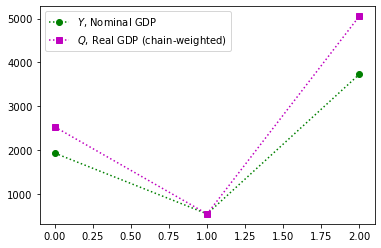

In [17]:
plt.figure()
plt.plot(df.index, df["Y"], ":og", label=r"$Y$, Nominal GDP")
plt.plot(df.index, df["Q"], ":sm", label=r"$Q$, Real GDP (chain-weighted)")
plt.legend()
plt.show()

# Homework (exam-style)


    
Create an example with $t = 0, 1, ..., T-1$ and $i = 0, 1$. Assume $T = 150$.

1. Make up your own numbers for prices and quantities at each date $t$ and product $i$. 

2. Repeat the task in the last part for your example.

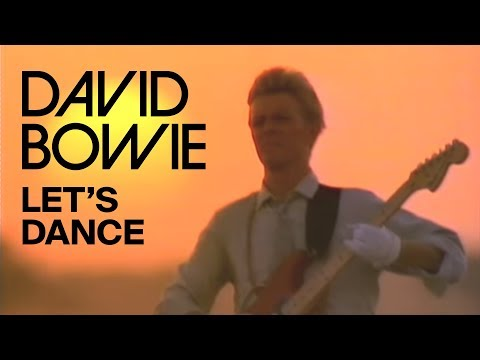

In [18]:
YouTubeVideo('VbD_kBJc_gI')

# Reference

* Whelan, K. (2002), A Guide To U.S. Chain Aggregated NIPA Data. *Review of Income and Wealth*, 48: 217-233. [doi:10.1111/1475-4991.00049](https://doi.org/10.1111/1475-4991.00049)

* Fisher, I. (1922), [*The Making of Index Numbers: A Study of Their Varieties, Tests, and Reliability*](https://books.google.com.au/books/about/The_Making_of_Index_Numbers.html?id=amAMCByD-JkC&source=kp_book_description&redir_esc=y). 
